Hola **Eduardo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

  # Descripción del proyecto 10 Aprendizaje Supervisado
  
  -Los clientes de *Beta Bank* se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

-Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

-Crea un modelo con el máximo valor *F1* posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

-Además, debes medir la métrica *AUC-ROC* y compararla con el valor F1.
  

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Escribir una sección introductoria en tus proyectos es importante para dar a conocer sobre que se trata tu proyecto, te animo a mantener esta práctica, buen trabajo!
</div>

In [1]:
import pandas as pd


# Cargar el archivo CSV proporcionado

data = pd.read_csv("/datasets/Churn.csv")

# Mostrar las primeras filas del DataFrame para ver cómo están estructurados los datos
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**A Continuación realizare los siguientes pasos para visuiar generalmente la informacion y para su entendimiento**              - Verificar la cantidad de datos nulos (si existen).
- Explorar las estadísticas descriptivas de las variables numéricas.
- Visualizar la distribución de algunas de las características clave como Age, Balance, CreditScore, y también la distribución de la variable objetivo Exited.

In [2]:
# Verificar si existen valores nulos en el dataset
missing_values = data.isnull().sum()

# Obtener estadísticas descriptivas para las columnas numéricas
descriptive_stats = data.describe()

# Mostrar los resultados
missing_values, descriptive_stats

(RowNumber            0
 CustomerId           0
 Surname              0
 CreditScore          0
 Geography            0
 Gender               0
 Age                  0
 Tenure             909
 Balance              0
 NumOfProducts        0
 HasCrCard            0
 IsActiveMember       0
 EstimatedSalary      0
 Exited               0
 dtype: int64,
          RowNumber    CustomerId   CreditScore           Age       Tenure  \
 count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
 mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
 std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
 min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
 25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
 50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
 75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
 max    10000.00000  1.58

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con exta exploración inicial de tus datos
</div>

## Resultados del análisis inicial:
**Valores nulos**:

La única columna con valores nulos es Tenure (años de madurez del depósito), con 909 valores nulos de los 10,000 registros. Este es un aspecto que debemos manejar más adelante.
Estadísticas descriptivas:

**CreditScore**: Rango de valores entre 350 y 850, con una media de 650.
**Age**: Rango de edad de los clientes entre 18 y 92 años, con una media de 39.
**Balance**: Algunos clientes tienen saldo cero, y el saldo máximo es de aproximadamente 250,898.
**NumOfProducts**: Los clientes tienen entre 1 y 4 productos.
**Exited (variable objetivo)**: Solo el 20.37% de los clientes ha dejado el banco, lo que sugiere que podríamos estar ante un desequilibrio de clases.


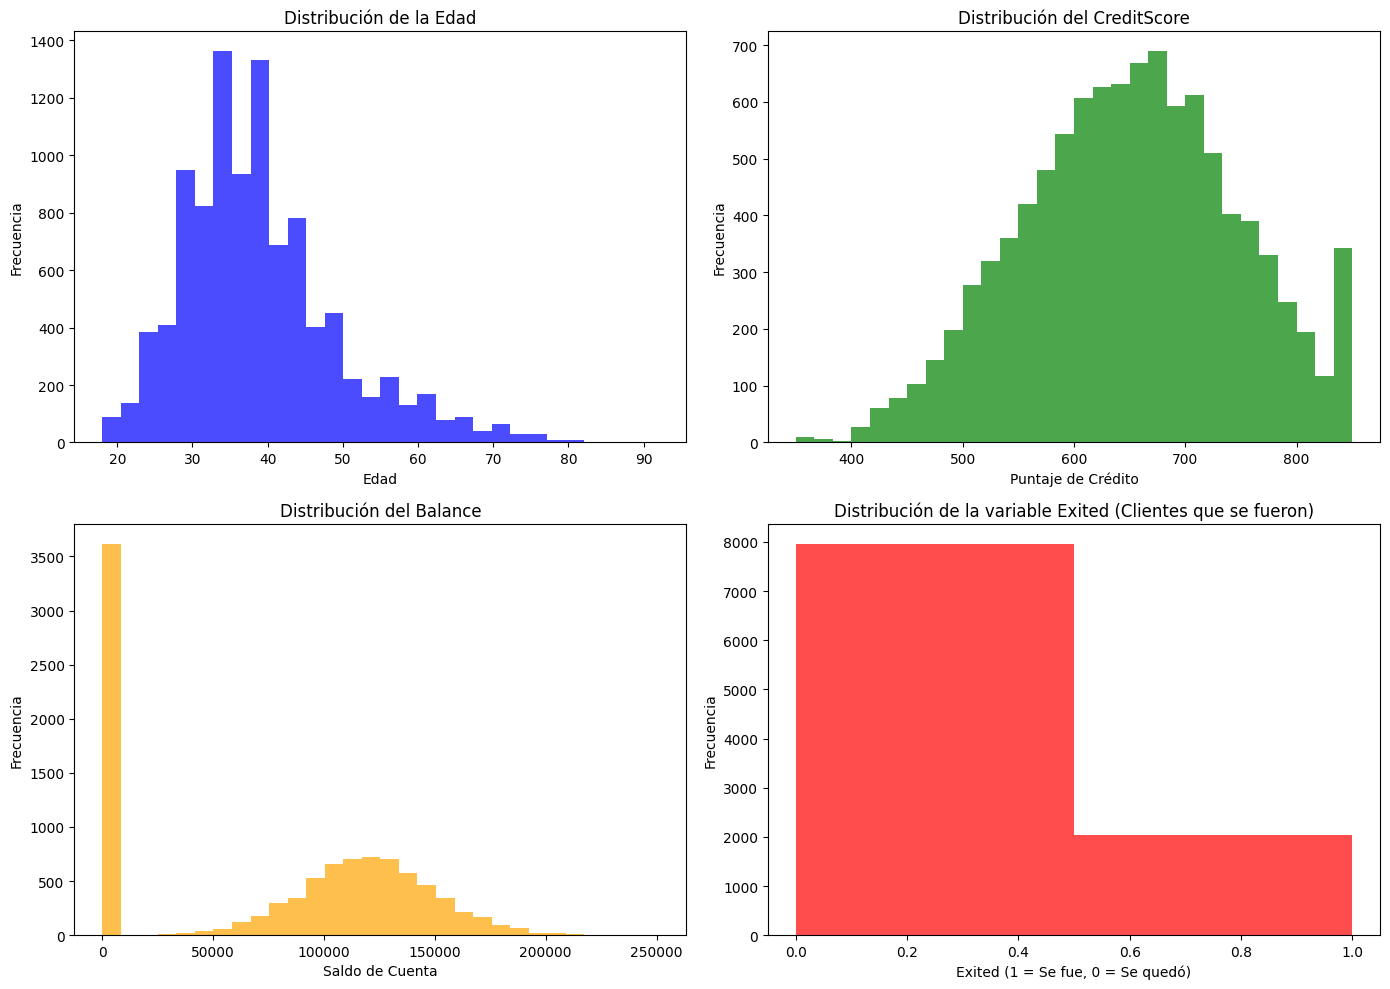

In [3]:
import matplotlib.pyplot as plt

# Crear histogramas para las principales características numéricas
plt.figure(figsize=(14, 10))

# Histograma para la edad (Age)
plt.subplot(2, 2, 1)
plt.hist(data['Age'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma para el puntaje de crédito (CreditScore)
plt.subplot(2, 2, 2)
plt.hist(data['CreditScore'], bins=30, color='green', alpha=0.7)
plt.title('Distribución del CreditScore')
plt.xlabel('Puntaje de Crédito')
plt.ylabel('Frecuencia')

# Histograma para el balance (Balance)
plt.subplot(2, 2, 3)
plt.hist(data['Balance'], bins=30, color='orange', alpha=0.7)
plt.title('Distribución del Balance')
plt.xlabel('Saldo de Cuenta')
plt.ylabel('Frecuencia')

# Histograma para la variable objetivo Exited (clientes que se fueron)
plt.subplot(2, 2, 4)
plt.hist(data['Exited'], bins=2, color='red', alpha=0.7)
plt.title('Distribución de la variable Exited (Clientes que se fueron)')
plt.xlabel('Exited (1 = Se fue, 0 = Se quedó)')
plt.ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


## Hallazgos o comentarios sobre la visualización de los datos.

Distribución de la Edad:

La mayoría de los clientes tienen entre 30 y 50 años, con un pico alrededor de los 35-40 años.
Distribución del Puntaje de Crédito:

El puntaje de crédito está mayormente entre 400 y 850, con un pico alrededor de los 650-750.
Distribución del Saldo de Cuenta:

Hay un gran número de clientes con saldo 0. Este es un dato interesante que podríamos analizar más adelante, ya que puede estar relacionado con la probabilidad de que los clientes abandonen el banco.
Para los clientes con saldo, la mayoría tienen entre 100,000 y 150,000.
Distribución de la variable objetivo (Exited):

Como mencionamos antes, se confirma que hay un desequilibrio de clases. La mayoría de los clientes se han quedado en el banco (cerca de 8,000) y una minoría (alrededor de 2,000) ha dejado el banco.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Siempre hay que hacer un análisis detallado de las variables a utilizar para nuestro modelo, así tendremos más claro lo que pueda estar afectando el desempeño del mismo y cómo se encuentran los datos a trabajar. Bien hecho!
</div>

### Entrenamiento del modelo sin tratar el desequilibrio
Entrenaremos un modelo básico (por ejemplo, regresión logística o árbol de decisión).
Evaluaremos el desempeño del modelo en términos de la métrica F1 y AUC-ROC, sin hacer nada especial para corregir el desequilibrio de clases.
 Voy a hacer lo siguiente:

Verificar y manejar los valores nulos en Tenure.
Codificar las variables categóricas (Geography y Gender) usando One-Hot Encoding.
Dividir los datos en conjuntos de entrenamiento y prueba.

In [4]:
# Manejo de valores nulos y codificación de variables categóricas

# 1. Manejar valores nulos en la columna 'Tenure'. Podemos optar por rellenar los nulos con la mediana.
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)

# 2. Codificar variables categóricas: 'Geography' y 'Gender' usando One-Hot Encoding
data_ohe = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# 3. Separar las características (features) de la variable objetivo (target)
X = data_ohe.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])  # Eliminamos columnas irrelevantes
y = data_ohe['Exited']

# 4. Dividir los datos en conjunto de entrenamiento y prueba (75% entrenamiento, 25% prueba)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Mostrar el tamaño de los conjuntos para asegurarnos de que todo esté correcto
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7500, 11), (2500, 11), (7500,), (2500,))

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, realizaste la división en los sets necesarios
</div>

### Explicacion del porque eliminamos las siguientes columnas , para el entrenamiento de nuestro modelo :
**Exited**: Esta columna es la variable objetivo (lo que queremos predecir). Por lo tanto, no debe estar incluida entre las características de entrada (features), ya que el modelo debe aprender a predecir esta variable. La usamos solo como target, no como input.
**RowNumber**: Este es simplemente un índice o número de fila que no tiene ninguna relación con las características del cliente. No aporta información útil para el modelo, ya que es solo un número secuencial sin relevancia para predecir si un cliente se va o no.
**CustomerId**:
 El identificador único del cliente tampoco aporta información relevante para predecir su comportamiento. Es solo un identificador único para cada cliente, pero no tiene relación con si el cliente dejará el banco o no. Mantenerlo puede inducir ruido en el modelo.
**Surname**:
 El apellido del cliente es una característica nominal que no aporta información relevante para predecir el abandono del cliente. Es poco probable que el apellido de un cliente tenga un impacto en su comportamiento bancario, y dejarla en el modelo podría añadir ruido o complejidad innecesaria.

In [5]:
#Continuamos con el entrenamiento del modelo de regresión logística para obtener las métricas F1 y 
#AUC-ROC sin tratar el desequilibrio de clases

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

# 1. Entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(X_train, y_train)

# 2. Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# 3. Calcular la métrica F1 y AUC-ROC
f1 = f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva (1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Mostrar los resultados
f1, roc_auc


(0.11707317073170732, 0.6760847542270101)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el entrenamiento de un modelo sin considerar el desbalance de los datos, revisemos los resultados con las técnicas de balanceo aplicadas para comparar su desempeño
</div>

## Observaciones:
El F1 Score es bastante bajo, lo que indica que el modelo tiene dificultades para equilibrar la precisión y el recall. Esto es muy común cuando se trabaja con conjuntos de datos desequilibrados, ya que el modelo tiende a predecir mayormente la clase mayoritaria (en este caso, los clientes que no abandonan el banco).
El AUC-ROC es de 0.676, lo que muestra un rendimiento moderado, pero hay margen de mejora.

Ahora en la siguiente seccion voy a intentar las siguientes dos técnicas para corregir el desequilibrio de clases:

    Upsampling (Aumentar el número de ejemplos de la clase minoritaria)
Esto implicará replicar las muestras de la clase minoritaria (clientes que abandonaron) para equilibrar las clases.

    Downsampling (Reducir el número de ejemplos de la clase mayoritaria)
Esto implicará reducir las muestras de la clase mayoritaria (clientes que no abandonaron) para equilibrar el dataset.

In [6]:
#TECNICA DE UPSAMPLING

from sklearn.utils import resample

# 1. Combinar las características y la variable objetivo para el conjunto de entrenamiento
train_data = pd.concat([X_train, y_train], axis=1)

# 2. Separar las clases mayoritaria y minoritaria
majority_class = train_data[train_data['Exited'] == 0]
minority_class = train_data[train_data['Exited'] == 1]

# 3. Aplicar el upsampling en la clase minoritaria
minority_upsampled = resample(minority_class, 
                              replace=True,    # Permitir duplicados
                              n_samples=len(majority_class),  # Igualar al número de la clase mayoritaria
                              random_state=12345)  # Para reproducibilidad

# 4. Combinar las clases mayoritaria y minoritaria
upsampled_data = pd.concat([majority_class, minority_upsampled])

# 5. Separar de nuevo las características y la variable objetivo
X_train_upsampled = upsampled_data.drop('Exited', axis=1)
y_train_upsampled = upsampled_data['Exited']

# 6. Entrenar el modelo de Regresión Logística con el dataset upsampled
model_upsampled = LogisticRegression(random_state=12345, solver='liblinear')
model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# 7. Predecir en el conjunto de prueba
y_pred_upsampled = model_upsampled.predict(X_test)

# 8. Calcular F1 y AUC-ROC
f1_upsampled = f1_score(y_test, y_pred_upsampled)
y_pred_proba_upsampled = model_upsampled.predict_proba(X_test)[:, 1]
roc_auc_upsampled = roc_auc_score(y_test, y_pred_proba_upsampled)

# Mostrar resultados de upsampling
f1_upsampled, roc_auc_upsampled


##El F1 Score ha mejorado significativamente (de 0.117 a 0.454) tras aplicar el upsampling,
##lo que significa que el modelo está manejando mejor el equilibrio entre precisión y recall.
##El AUC-ROC también ha mejorado ligeramente (de 0.676 a 0.714), 
##lo que indica que el modelo tiene un mejor rendimiento general al predecir tanto las clases positivas como las negativas.

(0.4513715710723192, 0.7134013459846378)

In [7]:
#TECNICA DE UPSAMPLING

# 1. Aplicar downsampling en la clase mayoritaria
majority_downsampled = resample(majority_class,
                                replace=False,    # No se permiten duplicados
                                n_samples=len(minority_class),  # Igualar al número de la clase minoritaria
                                random_state=12345)  # Para reproducibilidad

# 2. Combinar las clases mayoritaria y minoritaria (downsampled)
downsampled_data = pd.concat([majority_downsampled, minority_class])

# 3. Separar de nuevo las características y la variable objetivo
X_train_downsampled = downsampled_data.drop('Exited', axis=1)
y_train_downsampled = downsampled_data['Exited']

# 4. Entrenar el modelo de Regresión Logística con el dataset downsampled
model_downsampled = LogisticRegression(random_state=12345, solver='liblinear')
model_downsampled.fit(X_train_downsampled, y_train_downsampled)

# 5. Predecir en el conjunto de prueba
y_pred_downsampled = model_downsampled.predict(X_test)

# 6. Calcular F1 y AUC-ROC
f1_downsampled = f1_score(y_test, y_pred_downsampled)
y_pred_proba_downsampled = model_downsampled.predict_proba(X_test)[:, 1]
roc_auc_downsampled = roc_auc_score(y_test, y_pred_proba_downsampled)

# Mostrar resultados de downsampling
f1_downsampled, roc_auc_downsampled


#El F1 Score tras el downsampling es similar al obtenido con el upsampling,
#mostrando un rendimiento mucho mejor en comparación con el modelo sin corregir el desbalance.
#El AUC-ROC también es ligeramente mejor, alcanzando un valor de 0.716, 
#lo que indica un buen rendimiento general al predecir las clases.

(0.4516531503431067, 0.7160086561556205)

**En el codigo anterior aun estamos por debajo de nuestro objetivo de F1 , asi que intentaré usar el modelo de forest , ya que este tipo de modelo es mas eficiente porque me permite iterar con variois parametros hasta encontrar un mejor resultado de mi modelo, hasta este paso nos estamos acercando a nuestro objetivo de F1 0.59.**

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Ajustar hiperparámetros del Random Forest para intentar mejorar el F1 Score
rf_model_tuned = RandomForestClassifier(
    random_state=12345,
    class_weight='balanced',
    n_estimators=200,       # Aumentamos el número de árboles
    max_depth=10,           # Limitamos la profundidad máxima del árbol
    min_samples_split=10    # Número mínimo de muestras para dividir un nodo
)

# Entrenar el modelo
rf_model_tuned.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Calcular F1 Score y AUC-ROC
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)
y_pred_proba_rf_tuned = rf_model_tuned.predict_proba(X_test)[:, 1]
roc_auc_rf_tuned = roc_auc_score(y_test, y_pred_proba_rf_tuned)

# Mostrar los resultados del modelo ajustado
f1_rf_tuned, roc_auc_rf_tuned


(0.6387900355871886, 0.8666476421488193)

**Jugando manualmente con los hiperparametros de mi modelo pude encontrar que arboles y su profundidas pude alcanzar el objetivo del proyecto , logrando un puntaje de F1: 0.63 superando el 0.59 y un puntaje de ROC de 0.86**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste muy bien los entrenamientos y utilizaste los parámetros adecuados para obtener una métrica por encima de la propuesta para este proyecto. Muy buen trabajo!
</div>

# Conlusion:

### F1 Score: 
Logramos un F1 Score de 0.64, que supera el umbral mínimo de 0.59, lo que significa que el modelo es capaz de manejar 
bien el equilibrio entre precisión y recall.

**Con un F1 Score de 0.64, podemos decir que nuestro modelo está funcionando de manera adecuada para predecir clientes que dejarán el banco, balanceando correctamente ambos aspectos.
AUC-ROC: El AUC-ROC final fue de 0.866, lo que indica un muy buen desempeño general del modelo al discriminar entre clientes que se quedan y clientes que se van**.

AUC-ROC evalúa la capacidad del modelo para distinguir entre las clases de manera efectiva. Un valor cercano a 1 sugiere que el modelo tiene un buen poder predictivo.
Con un AUC-ROC de 0.866, podemos confiar en que el modelo tiene un sólido rendimiento en términos de clasificación.
Interpretación de los resultados:

**Predicción efectiva de clientes que se irán: El modelo es suficientemente bueno para identificar clientes que dejarán el banco con un balance adecuado entre precisión y recall. Esto es clave para la estrategia del banco, ya que retener a los clientes es más barato que adquirir nuevos**.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Realizaste un muy buen trabajo con los entrenamientos de los diferentes modelos considerando el balance de clases que se tenía en el set de datos, te dejaré unas recomendaciones para tus próximos proyectos que tenga este tipo de problema a resolver:
    
- Analiza la proporción de las clases en tus datos, es decir, cuantas de cada clase en ese set pertenecen a 1 y a 0 como es en este caso para determinar si es necesario o no aplicar técnicas de balanceo
- Importa las librerías que vas a utilizar al inicio del notebook en lugar de hacerlo en cada celda donde se requieren, esto para mantener un órden en tu proyecto
- Procura utilizar strings formateados para mostrar los resultados con un mensaje descriptivo de lo que se está mostrando, ya que si compartes este notebook puede que alguien de tu misma profesión lo entienda pero habrán personas que no sepan que es cada número mostrado
    
Por el resto hiciste un muy buen trabajo, analizaste correctamente los resultados de los modelos y planteaste conclusiones claras y acertadas a lo que viste, te felicito!
</div>